In [7]:
import os
import time
import subprocess
import glob
from pprint import pprint
import numpy as np
from numpy.linalg import norm
import itertools 
import re
import pandas as pd

root_dir = os.getcwd() + '\..'
sys.path.append(root_dir)

from orca_wrapper import run_orca, parse_orca_output

# Oxygen Orbital Analysis

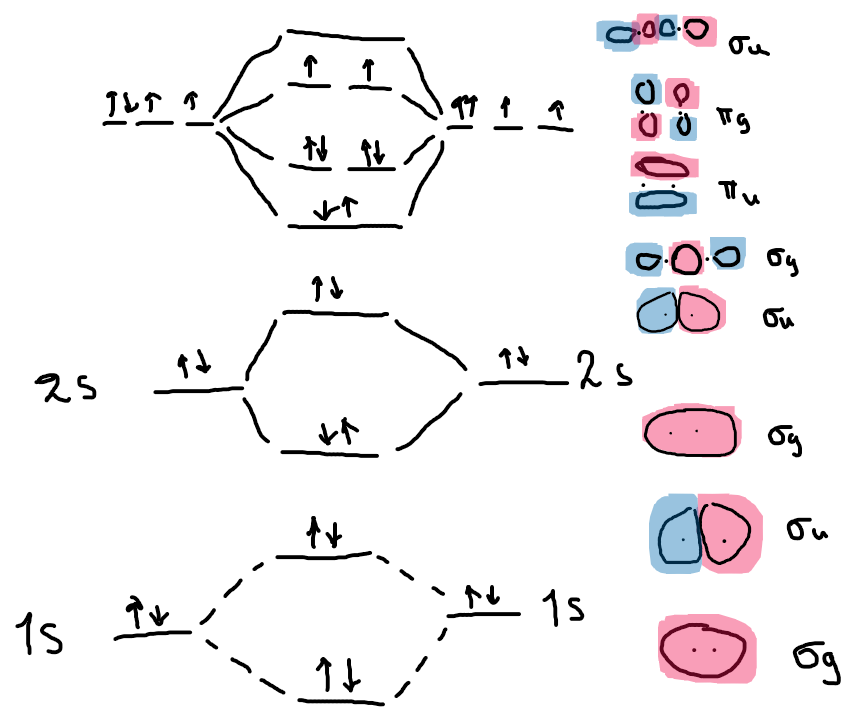

# Run input

In [2]:
if 'Orca_Calculations' in os.listdir():
    os.chdir('Orca_Calculations')

In [3]:
os.chdir('Oxygen_Spin')
input_files = glob.glob('*.inp')
output_files = [inp.replace('.inp', '.out') for inp in input_files]

for i_file, o_file in zip(input_files, output_files):
    run_orca(i_file, o_file)
    time.sleep(1)

print("Done!")

search_terms = {'entropy': 'Final entropy term',
                'gibbs free energy': 'Final Gibbs free energy',
                'total enthalpy': 'Total Enthalpy',
                'thermal energy': 'Total thermal energy',
                'total energy': 'FINAL SINGLE POINT ENERGY'}







Running O2_S=0_geoopt.inp
Writing to O2_S=0_geoopt.out

Running O2_S=0_SP.inp
[file orca_tools/qcmsg.cpp, line 458]: 
  .... aborting the run


Writing to O2_S=0_SP.out

Running O2_S=2_geoopt.inp
Writing to O2_S=2_geoopt.out

Running O2_S=2_SP.inp
Writing to O2_S=2_SP.out
Done!


In [4]:
#os.chdir('Oxygen_Spin')

In [15]:

mol_terms = {}
for o_file in output_files:
    mol = ' '.join(o_file.split('_')[0:2])
    print(f'\n{mol}:')
    terms = parse_orca_output(o_file)
    if len(terms):
        mol_terms[mol] = terms

mol_df = pd.DataFrame(mol_terms) * 627.5094740631
mol_df
#os.chdir('..')



O2 S=0:
FINAL SINGLE POINT ENERGY      -150.081532470477
FINAL SINGLE POINT ENERGY      -150.081586666935
FINAL SINGLE POINT ENERGY      -150.081587895892
FINAL SINGLE POINT ENERGY      -150.081587896635
Total thermal energy                   -150.07539988 Eh
Total Enthalpy                    ...   -150.07445567 Eh
Final entropy term                ...      0.02222853 Eh     13.95 kcal/mol
Final Gibbs free energy         ...   -150.09668419 Eh

O2 S=0:

O2 S=2:
FINAL SINGLE POINT ENERGY      -150.144754457925
FINAL SINGLE POINT ENERGY      -150.144835334419
FINAL SINGLE POINT ENERGY      -150.144836875443
FINAL SINGLE POINT ENERGY      -150.144836876897
Total thermal energy                   -150.13861214 Eh
Total Enthalpy                    ...   -150.13766793 Eh
Final entropy term                ...      0.02326364 Eh     14.60 kcal/mol
Final Gibbs free energy         ...   -150.16093157 Eh

O2 S=2:
FINAL SINGLE POINT ENERGY      -150.140939379459


,O2 S=0,O2 S=2
total energy,-94177.618288,-94214.861905
thermal energy,-94173.735249,NaN
total enthalpy,-94173.142748,NaN
entropy,13.948613,NaN
gibbs free energy,-94187.091355,NaN


In [35]:
output_files

[]

In [5]:
input_files = glob.glob('*_geoopt.inp')
output_files = [inp.replace('.inp', '.out') for inp in input_files]

for i_file, o_file in zip(input_files, output_files):
    run_orca(i_file, o_file)
    time.sleep(1)

print("Done!")

os.chdir('..')

Done!


# Parse output

In [6]:
search_terms = {'entropy': 'Final entropy term',
                'gibbs free energy': 'Final Gibbs free energy',
                'total enthalpy': 'Total Enthalpy',
                'thermal energy': 'Total thermal energy',
                'total energy': 'FINAL SINGLE POINT ENERGY'}

mol_terms = {}

for o_file in output_files:
    mol = o_file.split('_')[0]
    print(f'\n{mol}:')
    parse_orca_output(o_file)
    if len(terms):
        mol_terms[mol] = terms

mol_df = pd.DataFrame(mol_terms) * 627.5094740631
mol_df


O2:


NameError: name 'o_file' is not defined

In [14]:
table = mol_df.T.to_latex(float_format="%.2f")

latex_fixes = {'entropy': '$TS$',
               'gibbs free enthalpy': '$G$',
               'total enthalpy': '$H$',
               'thermal energy': '$E_{\mathrm{thermal}}$',
               'total energy': '$E_{tot}$'}

for key in latex_fixes:
    table = table.replace(key, latex_fixes[key])

pattern = re.compile(r'\n[A-Z0-9]+')
matches = pattern.findall(table)

for mol in matches:
    table = table.replace(mol, f'\n\\ce{{{mol.strip()}}}')
print(table)

\begin{tabular}{lrrrrr}
\toprule
{} &  $E_{tot}$ &  $E_{\mathrm{thermal}}$ &  $H$ &  $TS$ &  gibbs free energy \\
\midrule
\ce{CH4}   &     -25383.90 &       -25354.25 &       -25353.66 &    13.28 &          -25366.94 \\
\ce{CO2}   &    -118197.93 &      -118188.89 &      -118188.30 &    15.24 &         -118203.53 \\
\ce{H2O}   &     -47892.26 &       -47877.17 &       -47876.58 &    13.46 &          -47890.03 \\
\ce{N2}    &     -68641.39 &       -68636.35 &       -68635.76 &    13.65 &          -68649.41 \\
\ce{NCNO2} &    -186699.68 &      -186684.36 &      -186683.77 &    20.01 &         -186703.78 \\
\ce{O2}    &     -94217.31 &       -94213.40 &       -94212.81 &    14.60 &          -94227.41 \\
\bottomrule
\end{tabular}



In [15]:
reactions = [[[[1, 'CH4'], [2, 'O2']], 
              [[1, 'CO2'],[2,'H2O']]], 
             [[[1,'NCNO2']],
              [[1,'N2'],[1,'CO2']]]]

diffs = {}

for reac in reactions:

    chem_form = lambda n, m: str(n) + m if n > 1 else m

    reaction_str = ' + '.join([chem_form(r[0], r[1]) for r in reac[0]])
    reaction_str += ' -> '
    reaction_str += ' + '.join([chem_form(r[0], r[1]) for r in reac[1]])

    print(f'\n{reaction_str}')

    reactants_thermo = sum([r[0]*mol_df[r[1]] for r in reac[0]])
    products_thermo = sum([r[0]*mol_df[r[1]] for r in reac[1]])

    diff = products_thermo - reactants_thermo

    diffs[reaction_str] = diff

    print(f'{diff}')

reaction_df = pd.DataFrame(diffs)
reaction_df.T


CH4 + 2O2 -> CO2 + 2H2O
total energy        -163.928683
thermal energy      -162.176636
total enthalpy      -162.176636
entropy               -0.323469
gibbs free energy   -161.853161
dtype: float64

NCNO2 -> N2 + CO2
total energy        -139.640055
thermal energy      -140.882711
total enthalpy      -140.290210
entropy                8.875193
gibbs free energy   -149.165403
dtype: float64


,total energy,thermal energy,total enthalpy,entropy,gibbs free energy
CH4 + 2O2 -> CO2 + 2H2O,-163.928683,-162.176636,-162.176636,-0.323469,-161.853161
NCNO2 -> N2 + CO2,-139.640055,-140.882711,-140.290210,8.875193,-149.165403


In [16]:
table = reaction_df.T.to_latex(float_format="%.2f")

latex_fixes = {'entropy': '$\Delta TS$',
               'gibbs free energy': '$\Delta G$',
               'total enthalpy': '$\Delta H$',
               'thermal energy': '$\Delta E_{\mathrm{thermal}}$',
               'total energy': '$\Delta E_{tot}$'}

for key in latex_fixes:
    table = table.replace(key, latex_fixes[key])

pattern = re.compile(r'\n[A-Z0-9]+(?:\s[+]\s[A-Z0-9]*)?\s[->]+\s[A-Z0-9]+(?:\s[+]\s[A-Z0-9]*)?')
matches = pattern.findall(table)

for reac in matches:
    table = table.replace(reac, f'\n\\ce{{{reac.strip()}}}')
print(table)

\begin{tabular}{lrrrrr}
\toprule
{} &  $\Delta E_{tot}$ &  $\Delta E_{\mathrm{thermal}}$ &  $\Delta H$ &  $\Delta TS$ &  $\Delta G$ \\
\midrule
\ce{CH4 + 2O2 -> CO2 + 2H2O} &       -163.93 &         -162.18 &         -162.18 &    -0.32 &            -161.85 \\
\ce{NCNO2 -> N2 + CO2}       &       -139.64 &         -140.88 &         -140.29 &     8.88 &            -149.17 \\
\bottomrule
\end{tabular}



In [17]:
molar_mass = {'CH4': 16.04246, 'O2': 31.9988, 'NCNO2': 70}
density = {'CH4': 0.424, 'O2': 1.14, 'NCNO2': 1.24}
molar_volume = {}
for key in molar_mass:
    molar_volume[key] = molar_mass[key] * density[key]

molar_volume

{'CH4': 6.802003039999999, 'O2': 36.478632, 'NCNO2': 86.8}

In [20]:
weight_df = reaction_df.copy()

weight_df['CH4 + 2O2 -> CO2 + 2H2O'] /= (molar_mass['CH4'] + 2*molar_mass['O2'])
weight_df['NCNO2 -> N2 + CO2'] /= (molar_mass['NCNO2'])

weight_df.T

,total energy,thermal energy,total enthalpy,entropy,gibbs free energy
CH4 + 2O2 -> CO2 + 2H2O,-2.048083,-2.026193,-2.026193,-0.004041,-2.022152
NCNO2 -> N2 + CO2,-1.994858,-2.012610,-2.004146,0.126788,-2.130934


In [21]:
table = weight_df.T.to_latex(float_format="%.2f")

latex_fixes = {'entropy': '$\Delta TS$',
               'gibbs free energy': '$\Delta G$',
               'total enthalpy': '$\Delta H$',
               'thermal energy': '$\Delta E_{\mathrm{thermal}}$',
               'total energy': '$\Delta E_{tot}$'}

for key in latex_fixes:
    table = table.replace(key, latex_fixes[key])

pattern = re.compile(r'\n[A-Z0-9]+(?:\s[+]\s[A-Z0-9]*)?\s[->]+\s[A-Z0-9]+(?:\s[+]\s[A-Z0-9]*)?')
matches = pattern.findall(table)

for reac in matches:
    table = table.replace(reac, f'\n\\ce{{{reac.strip()}}}')
print(table)

\begin{tabular}{lrrrrr}
\toprule
{} &  $\Delta E_{tot}$ &  $\Delta E_{\mathrm{thermal}}$ &  $\Delta H$ &  $\Delta TS$ &  $\Delta G$ \\
\midrule
\ce{CH4 + 2O2 -> CO2 + 2H2O} &         -2.05 &           -2.03 &           -2.03 &    -0.00 &              -2.02 \\
\ce{NCNO2 -> N2 + CO2}       &         -1.99 &           -2.01 &           -2.00 &     0.13 &              -2.13 \\
\bottomrule
\end{tabular}



In [22]:
volume_df = reaction_df.copy()

volume_df['CH4 + 2O2 -> CO2 + 2H2O'] /= (molar_volume['CH4'] + 2*molar_volume['O2'])
volume_df['NCNO2 -> N2 + CO2'] /= (molar_volume['NCNO2'])

density_df.T

NameError: name 'density_df' is not defined

In [23]:
table = density_df.T.to_latex(float_format="%.2f")

latex_fixes = {'entropy': '$\Delta TS$',
               'gibbs free energy': '$\Delta G$',
               'total enthalpy': '$\Delta H$',
               'thermal energy': '$\Delta E_{\mathrm{thermal}}$',
               'total energy': '$\Delta E_{tot}$'}

for key in latex_fixes:
    table = table.replace(key, latex_fixes[key])

pattern = re.compile(r'\n[A-Z0-9]+(?:\s[+]\s[A-Z0-9]*)?\s[->]+\s[A-Z0-9]+(?:\s[+]\s[A-Z0-9]*)?')
matches = pattern.findall(table)

for reac in matches:
    table = table.replace(reac, f'\n\\ce{{{reac.strip()}}}')
print(table)

NameError: name 'density_df' is not defined